# Amostragem de Sinais

**Objetivos**
1. Amostrar sinais com diferentes frequências de amostragens

**Resultado Esperado**
1. Entender o efeito de aliasing/folding

**Entrega**
1. *Dessa vez preciso de um arquivo zip, algum mp3 curto deve ser entregue!*

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.ion()

## Introdução

Na engenharia ou na ciência da computação, um sinal pode ser definido como uma função que transmite informações sobre o estado ou comportamento de um sistema físico. Por exemplo, um sinal pode descrever a pressão sonora variável no tempo em algum lugar ou o movimento de uma partícula através de algum espaço. Na nossa disciplina, consideramos o caso de sinais de som ou áudio, que podem ser representados graficamente por um gráfico que mostra a pressão atmosférica relativa (em relação a uma pressão atmosférica de referência) ao longo do tempo. Começamos este laboratório definindo formalmente um sinal como uma função matemática. 

Um som é gerado por um objeto vibratório, como as cordas vocais de um cantor, a corda e a caixa de ressonância de um violino ou o diafragma de um tímpano. No processamento de sinal, esse som é normalmente representado por uma função ou sinal f: R → R, que codifica as mudanças de pressão atmosférica do som ao longo do tempo. O sinal é chamado de periódico se seus valores se repetem em intervalos regulares. Falando intuitivamente, o período do sinal é definido como o tempo necessário para completar um ciclo. A frequência, medida em Hertz (Hz), é o recíproco do período. O protótipo de tal sinal periódico é uma senóide, que é especificada por sua frequência, sua amplitude (o desvio de pico da senóide de sua média) e sua fase (determinando onde em seu ciclo a senóide está no tempo zero). Na célula de código a seguir, fornecemos uma função para gerar uma senóide. 

Intercalando a teoria com a prática, fornecemos uma função Python para gerar uma senóide com diferentes parâmetros (duração, amplitude, frequência, fase, taxa de amostragem).

In [2]:
def gera_senoide(dur=1, amp=1, freq=1, fase=0, taxa_amost=100):
    """
    Gera uma senóide

    Parâmetros
    ----------
    dur: duração em segundos
    amp: amplitude da onda
    freq: frequência da senóide
    fase: deslocamento no eixo-x
    taxa_amost: taxa de amostragem
    
    Retorna
    -------
    x, t: os valores da senóide e os tempos
    """
    # cada sengundo gera taxa_amost amostras
    num_samples = int(taxa_amost * dur)

    # observe como o tempo é o número de amostras dividido pela taxa
    # inverso do acima.
    t = np.arange(num_samples) / taxa_amost
    x = amp * np.sin(2 * np.pi * (freq * t - fase))
    return x, t

Abaixo temos uma senóide simples.

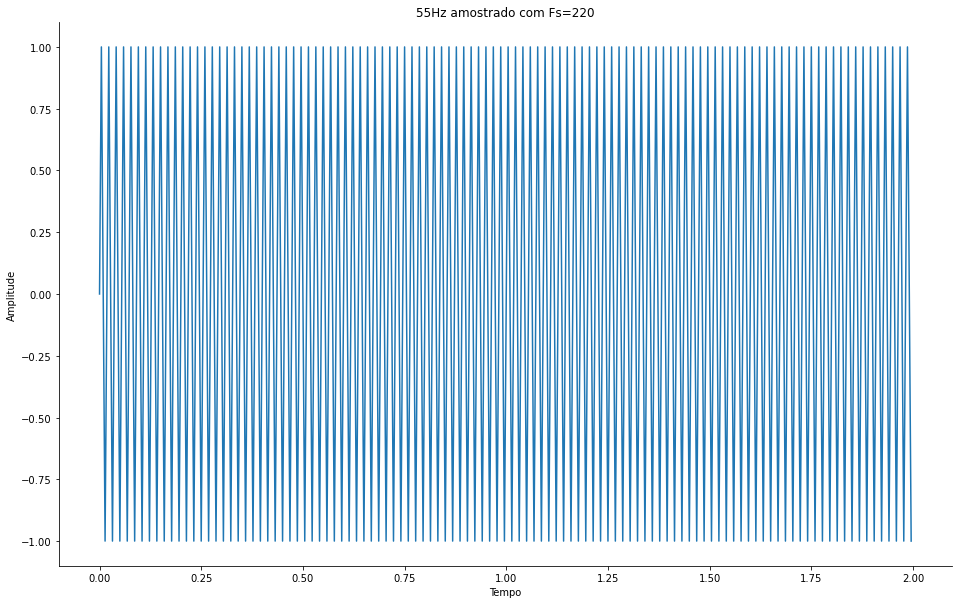

In [3]:
x, t = gera_senoide(dur=2, amp=1, freq=55, fase=0, taxa_amost=220)
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(t, x)
ax.set(xlabel='Tempo', ylabel='Amplitude', title='55Hz amostrado com Fs=220')
sns.despine(fig)

E agora um lindo **lá** de 440Hz, puro!

In [4]:
# Criei essa variável para que a célula debaixo funcione!
Fs = 900

In [5]:
dur = 10
x, t = gera_senoide(dur=dur, amp=1, freq=440, taxa_amost=900)

ipd.display(ipd.Audio(x, rate=Fs))

**Exercício 1: Simulando um Sinal Real** 

Crie uma função que toca *dó*, *ré*, *mi*, *fá*, *só*, *lá*,
*si*, *dó*. Cada nota vai ser tocada por um segundo!

Comece pelo *dó* unissono, de 132 Hz. Termine no *dó* de 264 Hz. Para lhe ajudar, ao invés de gerar apenas dó, re, mi, gere as doze notas das escala cromática.

Cada semitom deve ser tocado por um segundo. Coloque uma pausa de um segundo entre semitons. Assim, se você caminhar nos 12 semitons da escala cromática, sua música deve ser de 24 segundos.

*Para simular um sinal real, garanta que sua música tem uma taxa de amostragem alta suficiente, pelo menos o dobro do último semitom. Recomendo algo como 550 ou 1000*

In [6]:
def doremi():
    xs = []
    Fs = 4000
    
    for i in range(13):
        note_freq = 132 * 2**(i / 12)  # andando até a i-ésima nota
        
        # Gerando senoide referente à i-ésima nota
        x, _ = gera_senoide(dur=1, amp=1, freq=note_freq, taxa_amost=Fs)
        xs.extend(x)
        
        # Gerando 1 segundo de silêncio
        x, _ = gera_senoide(dur=1, amp=0, freq=note_freq, taxa_amost=Fs)
        xs.extend(x)
    
    return np.array(xs)

**Exercício 2: Toque sua música**

In [7]:
# Por simplificade também adicionei um segundo de silêncio após a última nota 
my_song = doremi()
ipd.display(ipd.Audio(my_song, rate=4000))

## Amostragem

No processamento de sinal digital, freqüentemente se reduz um sinal de tempo contínuo f: R → R em um sinal de tempo discreto x: Z → R por um procedimento conhecido como amostragem equidistante. Fixando um número real positivo $T > 0$, o sinal discreto $x$ é obtido por: 

$x(n) = f(n.T)$

Aqui, $n$ é um índice discreto.

In [8]:
n = 100
x[100]

-0.6427876096865534

Resumindo, esse procedimento também é chamado de amostragem uniforme. O número $T$ é referido como o período de amostragem, seu inverso $Fs: = 1 / T$ é a taxa de amostragem. A taxa de amostragem especifica o número de amostras por segundo e é medida em Hertz (Hz).

**Exercício 2 (Amostrando)**

Crie uma função que amostra a música acima com uma nova taxa de amostragem. Sei que parece estranho, mas preciso simular um aúdio real com a música acima. Então qual é a brincadeira, assuma que seu *dó, re, mi* é o sinal $f$. Crie uma nova função que amostra $f$ com uma outra taxa. A sua amostragem tem que ser uniforme seguindo: $x(n) = f(n.T)$. 

In [9]:
def amostra(f, tempo_sinal, taxa_amost):
    """
    Amstra um sinal de forma uniforme

    Parâmetros
    ----------
    f: o sinal em si
    tempo_sinal: o tempo total do sinal. No caso acima, seria 24 segundos.
    taxa_amost: a taxa de amostragem
    
    Retorna
    -------
    x: o sinal amostrado
    t: vetor do mesmo tamanho de x, mapeia cada posição para um novo tempo.
       este tempo seria o n.T, para cada n, descrito acima.
    """
    
    n_samples = int(tempo_sinal * taxa_amost)
    original_sampling = np.arange(0, tempo_sinal, 1/4000)  # originalmente o sinal foi amostrado usando Fs=4000
    
    t = np.arange(n_samples) / taxa_amost  # discretizando o tempo em passos 1 / Fs = T
    x = np.interp(t, original_sampling, f)  # amostrando f através de uma interpolação dos seus valores
    
    return x, t

**Exercício 3: Qual deve ser essa nova taxa de amostragem para reconstruir o sinal perfeitamente?**

- **Resposta:** Aplicando o teorema de Nyquist, como a maior frequência do nosso sinal será 264Hz (ou seja a última nota dó), nós devemos utilizar uma taxa de amostragem pelo menos o dobro disso.

    Para efeitos práticos é comum escolhermos na verdade uma taxa que seja pelo menos 2.5 vezes a maior frequência do nosso sinal por motivos técnicos de hardware que são mencionados no vídeo anexado no slide da aula de amostragem.

    Por exemplo uma taxa $Fs=660$ já seria o suficiente para "cobrir" a maior frequência do nosso sinal e possibilitar uma reconstrução perfeita (como podemos observar na célula abaixo).

In [10]:
x, t = amostra(my_song, tempo_sinal=26, taxa_amost=660)
ipd.display(ipd.Audio(x, rate=660))

## Reconstruindo o Sinal

O teorema da amostragem, frequentemente associado aos nomes Harry Nyquist e Claude Shannon, afirma que um sinal de tempo contínuo limitado em sua frequência máxima pode ser reconstruído perfeitamente sob certas condições. Em sala de aula não vimos os detalhes de como o sinal é reconstruído, porém abaixo temos a equação:

![](https://dcc.ufmg.br/~flaviovdf/mir/lab03/imgs/f.png)

Embora não temos a função o [Audacity](https://www.audacityteam.org/download/)
faz isso por nós. Leia a documentação [aqui](https://manual.audacityteam.org/man/importing_audio.html).

**Exercício 4: Carregue seu sinal amostrado no audacity com uma taxa de amostrage suficiente. O audacity tocou a mesma música? Tente com 264 exato,   metade disto, um quarto etc.**. 

- **Link para vídeo:** https://youtu.be/h9YPQ7uwAGM
- **Comentários:** Quando carregamos o sinal com a taxa de amostragem suficiente, por exemplo $Fs=660$, o audacity tocou a mesma música sem nenhuma alteração (possivelmente ficou só com um pouco menos de volume do que no notebook).

    Fiz um experimento onde abaixei a taxa de amostragem para $Fs=440$ e posteriormente $Fs=330$ (ou seja metade da taxa original). Com esse experimento foi possível observar as consequências do teorema de Nyquist na prática.
    
    Ao colocarmos a taxa para 440 podemos observar que não conseguimos mais reconstruir frequências maiores do que 220Hz. Esse fenômeno pode ser observado novamente ao trocarmos para 330, conseguindo reconstruir basicamente as primeiras notas do sinal que possuem frequência abaixo de $330/2 = 165\text{Hz}$.

    **Nota:** Não consegui gravar um caso de aliasing ao amostrarmos com outra taxa, mas para algumas taxas específicas nós teriamos um caso onde a nota é tocada mas ela parece ser mais grave do que era para ser.

**Exercício 5: Carregue seu sinal amostrado no audacity com uma taxa de amostrage menor do que a suficiente. Descreva os problemas na mesma!**. 

- **Resposta:** Os problemas já foram descritos na questão acima, onde percebemos que a partir de uma certa frequência nós não conseguimos mais reconstruir o sinal de forma correta.